In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("retail_store_inventory.csv")

# Exploratory Data Analysis (EDA)

In [3]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2023-10-24,S002,P0008,Electronics,North,225,148,144,144.33,41.475101,5,Snowy,1,43.741781,Spring
1,2023-03-11,S005,P0006,Electronics,South,200,144,119,120.34,18.521069,30,Cloudy,1,16.280283,Winter
2,2022-12-10,S001,P0005,Clothing,East,145,72,137,80.65,20.988375,11,Snowy,0,18.601075,Summer
3,2022-12-10,S001,P0018,Toys,East,350,148,157,103.77,106.162345,14,Sunny,1,95.284180,Winter
4,2023-01-22,S002,P0012,Groceries,North,145,94,145,93.18,9.922455,16,Sunny,1,12.419287,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53095,2023-09-26,S005,P0005,Groceries,East,313,45,198,50.96,20.507840,19,Sunny,0,20.118894,Spring
53096,2022-06-19,S005,P0004,Toys,West,305,112,92,100.35,77.965883,8,Snowy,0,80.298483,Winter
53097,2023-08-10,S001,P0016,Clothing,East,67,6,45,21.39,35.567713,32,Rainy,1,27.876384,Summer
53098,2023-05-19,S004,P0003,Groceries,East,76,63,31,82.61,28.687176,10,Rainy,0,29.317627,Spring


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53100 entries, 0 to 53099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                53100 non-null  object 
 1   Store ID            53100 non-null  object 
 2   Product ID          53100 non-null  object 
 3   Category            53100 non-null  object 
 4   Region              53100 non-null  object 
 5   Inventory Level     53100 non-null  int64  
 6   Units Sold          53100 non-null  int64  
 7   Units Ordered       53100 non-null  int64  
 8   Demand Forecast     53100 non-null  float64
 9   Price               53100 non-null  float64
 10  Discount            53100 non-null  int64  
 11  Weather Condition   53100 non-null  object 
 12  Holiday/Promotion   53100 non-null  int64  
 13  Competitor Pricing  53100 non-null  float64
 14  Seasonality         53100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 6.1+

In [5]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [6]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,53100.000000,53100.000000,53100.000000,53100.000000,53100.000000,53100.000000,53100.000000,53100.000000
mean,273.974765,150.382448,119.940998,143.988330,55.269469,15.778625,0.584350,55.282843
std,138.755647,128.673874,69.370066,111.253626,26.159569,12.094442,0.492838,26.324782
min,0.000000,-4.000000,20.000000,-9.870000,8.885993,0.000000,0.000000,5.001913
25%,159.000000,49.000000,67.000000,54.587500,32.822352,6.000000,0.000000,32.945138
50%,272.500000,115.000000,114.000000,114.995000,55.053172,15.000000,1.000000,55.035872
75%,389.000000,222.000000,162.000000,211.720000,77.550727,24.000000,1.000000,77.567403
max,794.000000,686.000000,676.000000,527.590000,115.891058,50.000000,1.000000,119.255444


In [7]:
df.describe(include="O")

,Date,Store ID,Product ID,Category,Region,Weather Condition,Seasonality
count,53100,53100,53100,53100,53100,53100,53100
unique,731,5,20,5,4,4,4
top,2022-05-08,S004,P0014,Toys,East,Snowy,Winter
freq,85,10688,2694,14120,16716,13373,18570


In [8]:
df=df.rename(columns={'Date':'date','Store ID':'storeID','Product ID':'productID','Category':'category',
                     'Region':'region','Inventory Level':'inventoryLevel','Units Sold':'unitsSold','Units Ordered':'unitsOrdered',
                     'Demand Forecast':'demandForecast','Price':'price','Discount':'discount','Weather Condition':'weatherCondition',
                     'Holiday/Promotion':'holiday/promotion','Competitor Pricing':'competitorPricing','Seasonality':'seasonality'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53100 entries, 0 to 53099
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               53100 non-null  object 
 1   storeID            53100 non-null  object 
 2   productID          53100 non-null  object 
 3   category           53100 non-null  object 
 4   region             53100 non-null  object 
 5   inventoryLevel     53100 non-null  int64  
 6   unitsSold          53100 non-null  int64  
 7   unitsOrdered       53100 non-null  int64  
 8   demandForecast     53100 non-null  float64
 9   price              53100 non-null  float64
 10  discount           53100 non-null  int64  
 11  weatherCondition   53100 non-null  object 
 12  holiday/promotion  53100 non-null  int64  
 13  competitorPricing  53100 non-null  float64
 14  seasonality        53100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 6.1+ MB


In [10]:
df.nunique()

date                   731
storeID                  5
productID               20
category                 5
region                   4
inventoryLevel         692
unitsSold              655
unitsOrdered           483
demandForecast       27686
price                53100
discount                51
weatherCondition         4
holiday/promotion        2
competitorPricing    53100
seasonality              4
dtype: int64

In [11]:
categorical_col=['storeID','productID','category','weatherCondition','seasonality']
for i in categorical_col:
    print("\n",df[i].unique())


 ['S002' 'S005' 'S001' 'S004' 'S003']

 ['P0008' 'P0006' 'P0005' 'P0018' 'P0012' 'P0002' 'P0003' 'P0020' 'P0004'
 'P0017' 'P0019' 'P0007' 'P0010' 'P0011' 'P0013' 'P0015' 'P0001' 'P0016'
 'P0009' 'P0014']

 ['Electronics' 'Clothing' 'Toys' 'Groceries' 'Furniture']

 ['Snowy' 'Cloudy' 'Sunny' 'Rainy']

 ['Spring' 'Winter' 'Summer' 'Autumn']


In [12]:
df['date'] = pd.to_datetime(df['date'])

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'inventoryLevel'}>,
        <Axes: title={'center': 'unitsSold'}>],
       [<Axes: title={'center': 'unitsOrdered'}>,
        <Axes: title={'center': 'demandForecast'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'discount'}>,
        <Axes: title={'center': 'holiday/promotion'}>,
        <Axes: title={'center': 'competitorPricing'}>]], dtype=object)

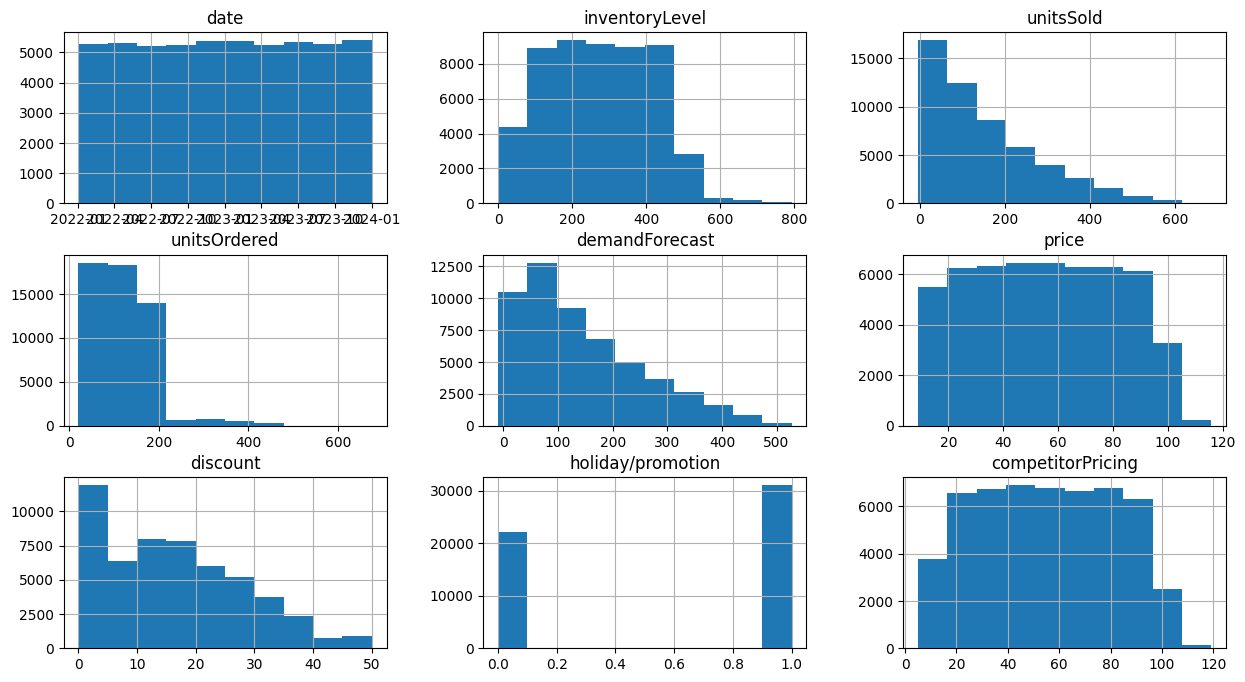

In [13]:
df.hist(figsize=(15,8))

<Axes: xlabel='holiday/promotion', ylabel='count'>

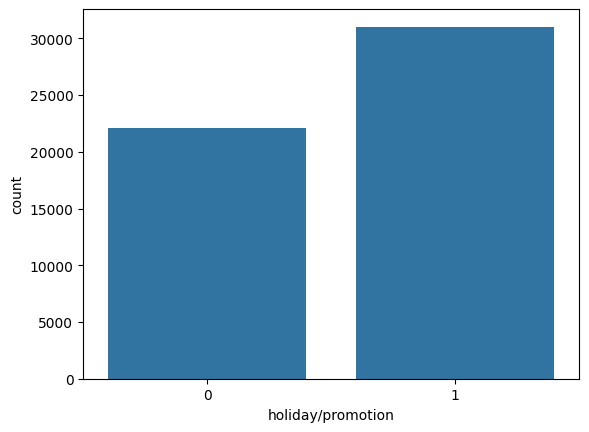

In [14]:
sns.countplot(data=df, x='holiday/promotion')

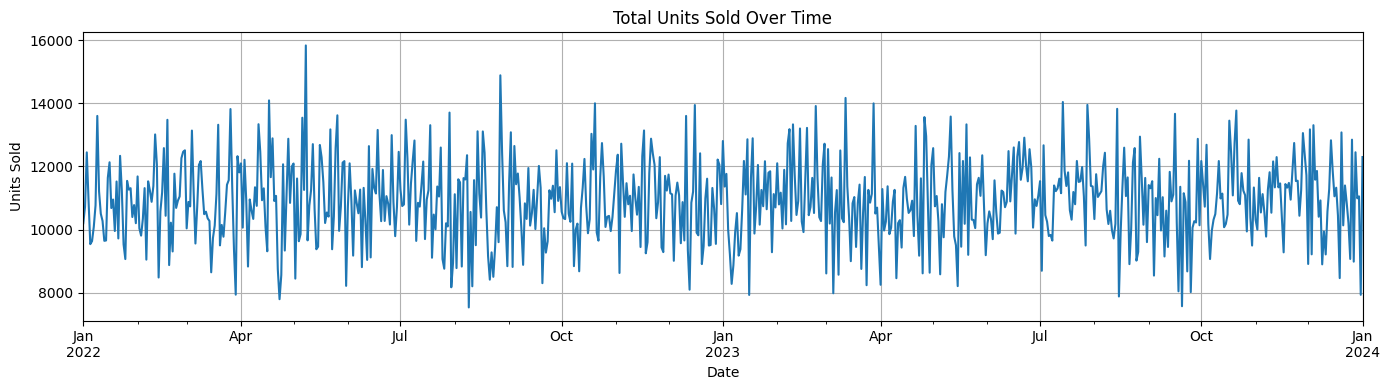

In [15]:
plt.figure(figsize=(14, 4))
df.groupby('date')['unitsSold'].sum().plot()
plt.title("Total Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.tight_layout()
plt.show()

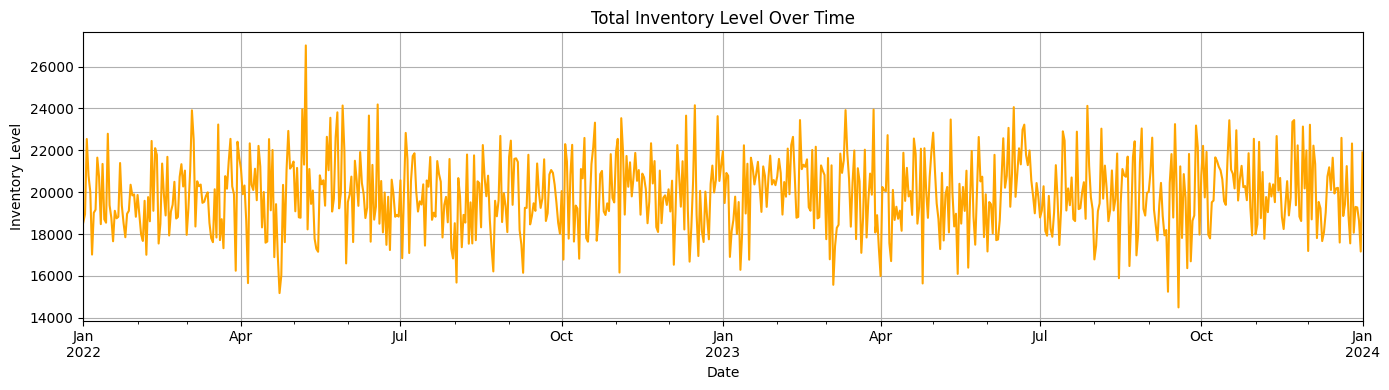

In [16]:
plt.figure(figsize=(14, 4))
df.groupby('date')['inventoryLevel'].sum().plot(color='orange')
plt.title("Total Inventory Level Over Time")
plt.xlabel("Date")
plt.ylabel("Inventory Level")
plt.grid(True)
plt.tight_layout()
plt.show()

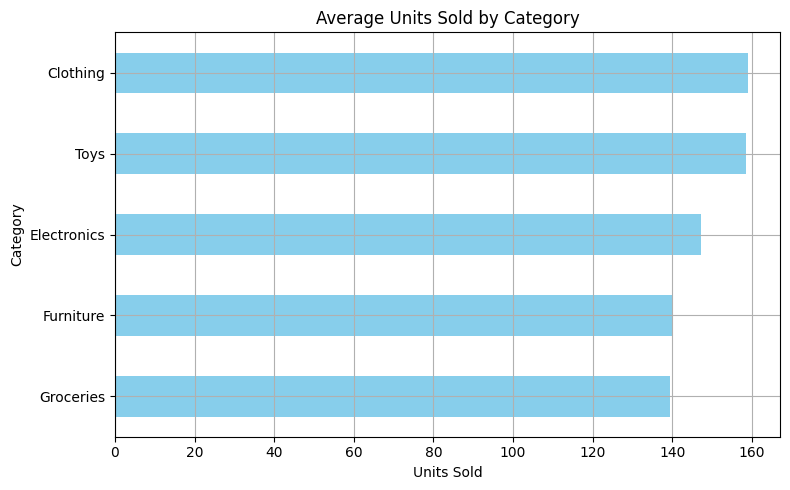

In [17]:
plt.figure(figsize=(8, 5))
df.groupby('category')['unitsSold'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title("Average Units Sold by Category")
plt.xlabel("Units Sold")
plt.ylabel("Category")
plt.grid(True)
plt.tight_layout()
plt.show()

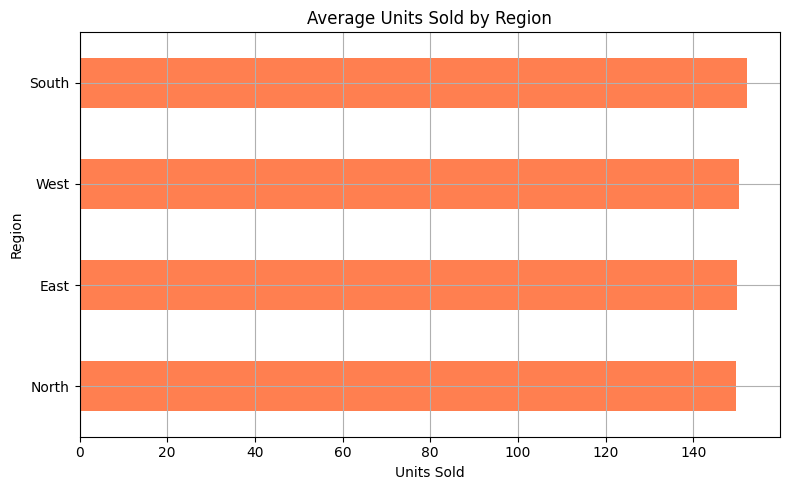

In [18]:
plt.figure(figsize=(8, 5))
df.groupby('region')['unitsSold'].mean().sort_values().plot(kind='barh', color='coral')
plt.title("Average Units Sold by Region")
plt.xlabel("Units Sold")
plt.ylabel("Region")
plt.grid(True)
plt.tight_layout()
plt.show()

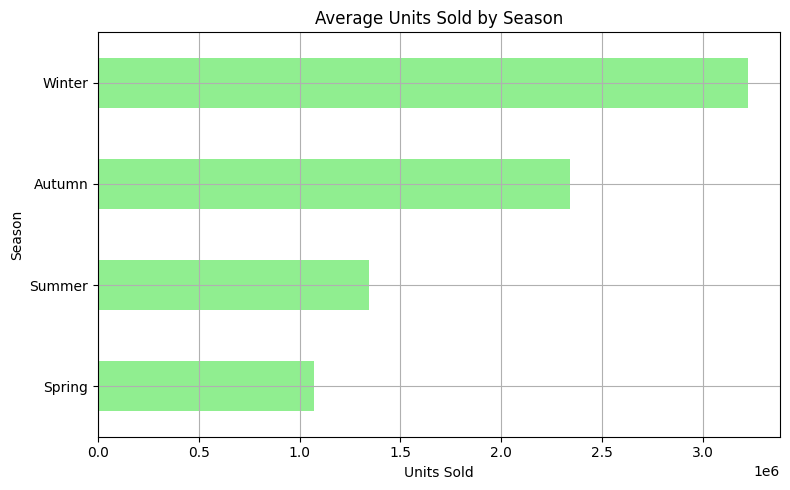

In [19]:
plt.figure(figsize=(8, 5))
df.groupby('seasonality')['unitsSold'].sum().sort_values().plot(kind='barh', color='lightgreen')
plt.title("Average Units Sold by Season")
plt.xlabel("Units Sold")
plt.ylabel("Season")
plt.grid(True)
plt.tight_layout()
plt.show()


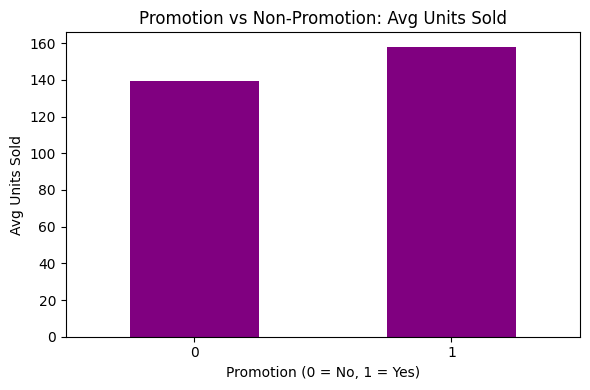

In [20]:
plt.figure(figsize=(6, 4))
df.groupby('holiday/promotion')['unitsSold'].mean().plot(kind='bar', color='purple')
plt.title("Promotion vs Non-Promotion: Avg Units Sold")
plt.xlabel("Promotion (0 = No, 1 = Yes)")
plt.ylabel("Avg Units Sold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [21]:
df['seasonality'].value_counts()

seasonality
Winter    18570
Autumn    15845
Summer    10650
Spring     8035
Name: count, dtype: int64

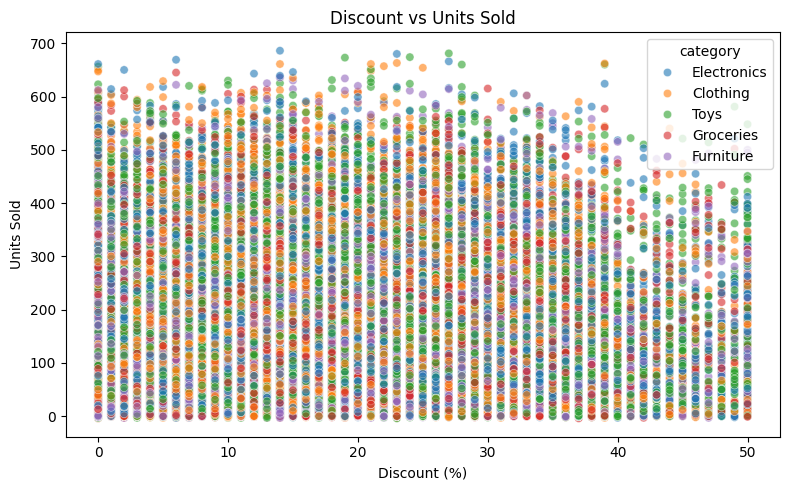

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='discount', y='unitsSold', hue='category', alpha=0.6)
plt.title("Discount vs Units Sold")
plt.xlabel("Discount (%)")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


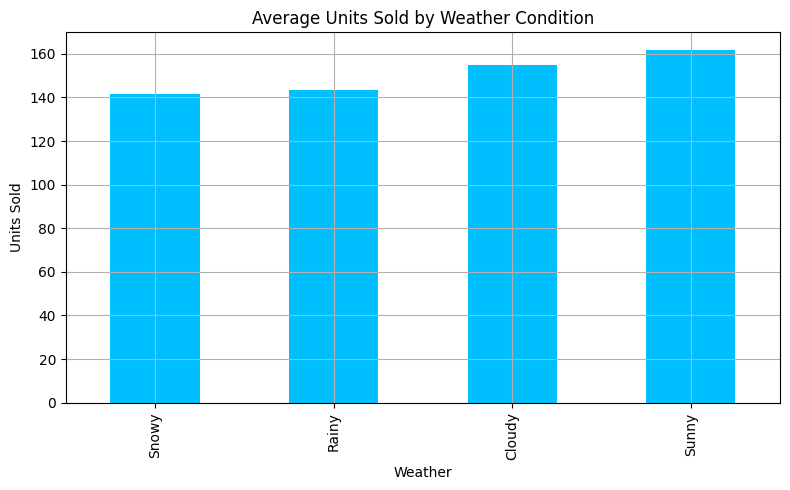

In [23]:
plt.figure(figsize=(8, 5))
df.groupby('weatherCondition')['unitsSold'].mean().sort_values().plot(kind='bar', color='deepskyblue')
plt.title("Average Units Sold by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Units Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


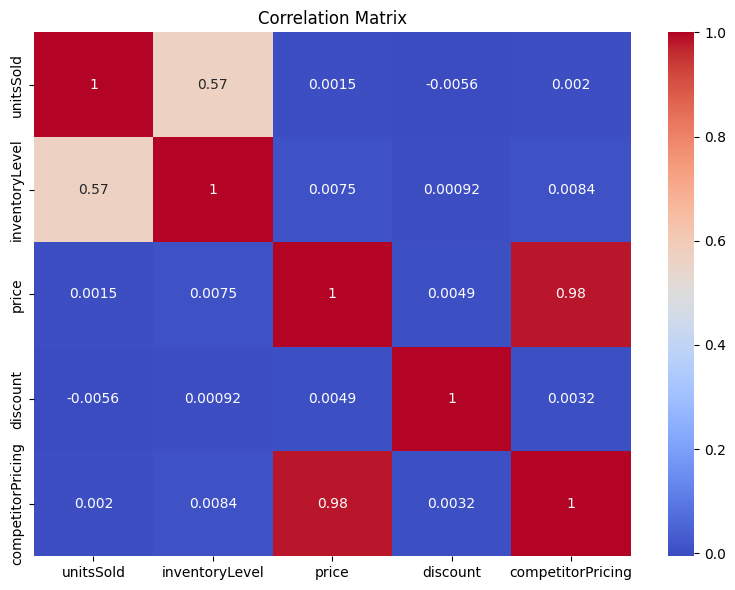

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['unitsSold', 'inventoryLevel', 'price', 'discount', 'competitorPricing']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


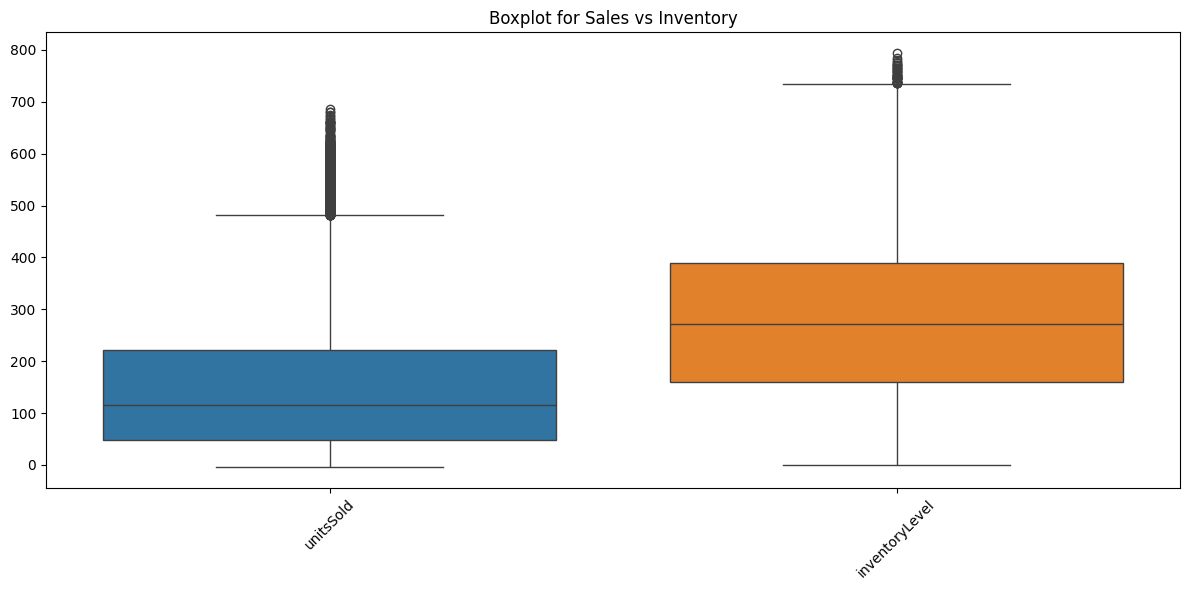

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['unitsSold', 'inventoryLevel' ]])
plt.title("Boxplot for Sales vs Inventory")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


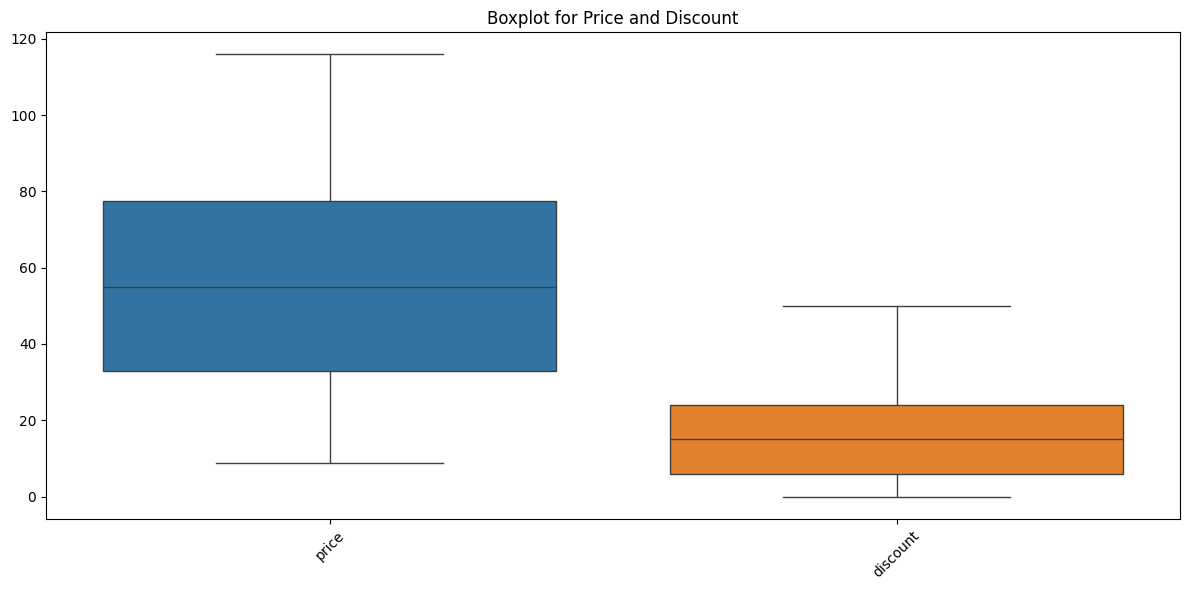

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['price', 'discount' ]])
plt.title("Boxplot for Price and Discount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data Preprocessing

In [27]:
df.isnull().sum()

date                 0
storeID              0
productID            0
category             0
region               0
inventoryLevel       0
unitsSold            0
unitsOrdered         0
demandForecast       0
price                0
discount             0
weatherCondition     0
holiday/promotion    0
competitorPricing    0
seasonality          0
dtype: int64

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df

,date,storeID,productID,category,region,inventoryLevel,unitsSold,unitsOrdered,demandForecast,price,discount,weatherCondition,holiday/promotion,competitorPricing,seasonality
0,2023-10-24,S002,P0008,Electronics,North,225,148,144,144.33,41.475101,5,Snowy,1,43.741781,Spring
1,2023-03-11,S005,P0006,Electronics,South,200,144,119,120.34,18.521069,30,Cloudy,1,16.280283,Winter
2,2022-12-10,S001,P0005,Clothing,East,145,72,137,80.65,20.988375,11,Snowy,0,18.601075,Summer
3,2022-12-10,S001,P0018,Toys,East,350,148,157,103.77,106.162345,14,Sunny,1,95.284180,Winter
4,2023-01-22,S002,P0012,Groceries,North,145,94,145,93.18,9.922455,16,Sunny,1,12.419287,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53095,2023-09-26,S005,P0005,Groceries,East,313,45,198,50.96,20.507840,19,Sunny,0,20.118894,Spring
53096,2022-06-19,S005,P0004,Toys,West,305,112,92,100.35,77.965883,8,Snowy,0,80.298483,Winter
53097,2023-08-10,S001,P0016,Clothing,East,67,6,45,21.39,35.567713,32,Rainy,1,27.876384,Summer
53098,2023-05-19,S004,P0003,Groceries,East,76,63,31,82.61,28.687176,10,Rainy,0,29.317627,Spring


In [30]:
df = df[df['unitsSold'] >= 0]


In [31]:
df

,date,storeID,productID,category,region,inventoryLevel,unitsSold,unitsOrdered,demandForecast,price,discount,weatherCondition,holiday/promotion,competitorPricing,seasonality
0,2023-10-24,S002,P0008,Electronics,North,225,148,144,144.33,41.475101,5,Snowy,1,43.741781,Spring
1,2023-03-11,S005,P0006,Electronics,South,200,144,119,120.34,18.521069,30,Cloudy,1,16.280283,Winter
2,2022-12-10,S001,P0005,Clothing,East,145,72,137,80.65,20.988375,11,Snowy,0,18.601075,Summer
3,2022-12-10,S001,P0018,Toys,East,350,148,157,103.77,106.162345,14,Sunny,1,95.284180,Winter
4,2023-01-22,S002,P0012,Groceries,North,145,94,145,93.18,9.922455,16,Sunny,1,12.419287,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53095,2023-09-26,S005,P0005,Groceries,East,313,45,198,50.96,20.507840,19,Sunny,0,20.118894,Spring
53096,2022-06-19,S005,P0004,Toys,West,305,112,92,100.35,77.965883,8,Snowy,0,80.298483,Winter
53097,2023-08-10,S001,P0016,Clothing,East,67,6,45,21.39,35.567713,32,Rainy,1,27.876384,Summer
53098,2023-05-19,S004,P0003,Groceries,East,76,63,31,82.61,28.687176,10,Rainy,0,29.317627,Spring


In [32]:
df = df[df['price'] >= 0]

In [33]:
df

,date,storeID,productID,category,region,inventoryLevel,unitsSold,unitsOrdered,demandForecast,price,discount,weatherCondition,holiday/promotion,competitorPricing,seasonality
0,2023-10-24,S002,P0008,Electronics,North,225,148,144,144.33,41.475101,5,Snowy,1,43.741781,Spring
1,2023-03-11,S005,P0006,Electronics,South,200,144,119,120.34,18.521069,30,Cloudy,1,16.280283,Winter
2,2022-12-10,S001,P0005,Clothing,East,145,72,137,80.65,20.988375,11,Snowy,0,18.601075,Summer
3,2022-12-10,S001,P0018,Toys,East,350,148,157,103.77,106.162345,14,Sunny,1,95.284180,Winter
4,2023-01-22,S002,P0012,Groceries,North,145,94,145,93.18,9.922455,16,Sunny,1,12.419287,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53095,2023-09-26,S005,P0005,Groceries,East,313,45,198,50.96,20.507840,19,Sunny,0,20.118894,Spring
53096,2022-06-19,S005,P0004,Toys,West,305,112,92,100.35,77.965883,8,Snowy,0,80.298483,Winter
53097,2023-08-10,S001,P0016,Clothing,East,67,6,45,21.39,35.567713,32,Rainy,1,27.876384,Summer
53098,2023-05-19,S004,P0003,Groceries,East,76,63,31,82.61,28.687176,10,Rainy,0,29.317627,Spring


In [34]:
df = df[(df['discount'] >= 0) & (df['discount'] <= 100)]


In [35]:
df = df[df['competitorPricing'] >= 0]


In [36]:
df.dtypes


date                 datetime64[ns]
storeID                      object
productID                    object
category                     object
region                       object
inventoryLevel                int64
unitsSold                     int64
unitsOrdered                  int64
demandForecast              float64
price                       float64
discount                      int64
weatherCondition             object
holiday/promotion             int64
competitorPricing           float64
seasonality                  object
dtype: object

# Feature Engineering & Preprocessing

In [37]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayOfWeek'] = df['date'].dt.dayofweek
df['weekOfYear'] = df['date'].dt.isocalendar().week
df['isWeekend'] = df['dayOfWeek'].isin([5, 6]).astype(int)


In [38]:
# Example: Lag of 1 day

df = df.sort_values(by=['productID', 'storeID', 'date'])
df['unitsSold_lag1'] = df.groupby(['productID', 'storeID'])['unitsSold'].shift(1)
df['demandForecast_lag1'] = df.groupby(['productID', 'storeID'])['demandForecast'].shift(1)
df.dropna(subset=['unitsSold_lag1', 'demandForecast_lag1'], inplace=True)

In [39]:
# df['unitsSold_rolling3'] = df.groupby(['productID', 'storeID'])['unitsSold'].shift(1).rolling(3).mean().reset_index(0, drop=True)


In [40]:
df1 = pd.get_dummies(df, columns=['storeID', 'productID', 'category', 'weatherCondition', 'seasonality','region'], drop_first=True)

In [41]:
df_model = df1.drop(columns=["date", "inventoryLevel"]) 

In [42]:
df_model.dropna(inplace=True)

In [43]:
X = df_model.drop("unitsSold", axis=1)
y = df_model["unitsSold"]

In [44]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Initialize and train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

In [47]:
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)


In [49]:
# Evaluate models
print("📊 Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print("\n🌲 Random Forest:")
print("R²:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

📊 Linear Regression:
R²: 0.9082006972539872
RMSE: 38.67360206967194

🌲 Random Forest:
R²: 0.9359116046582899
RMSE: 32.31354696298122


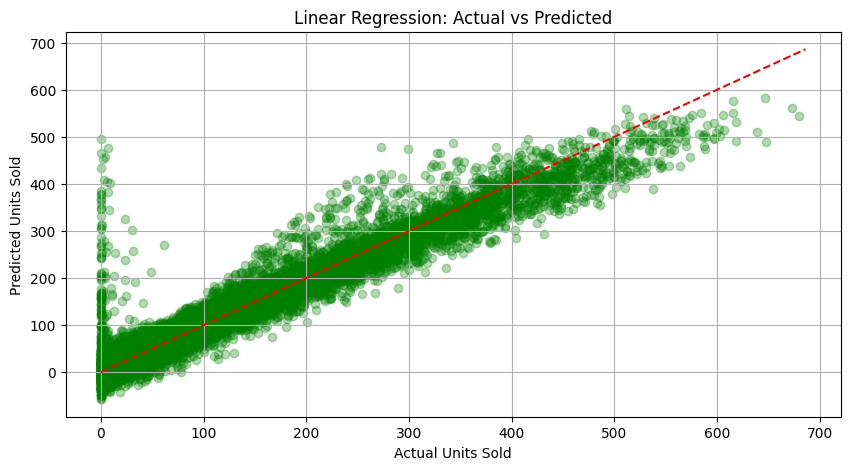

In [50]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.3, color='green')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

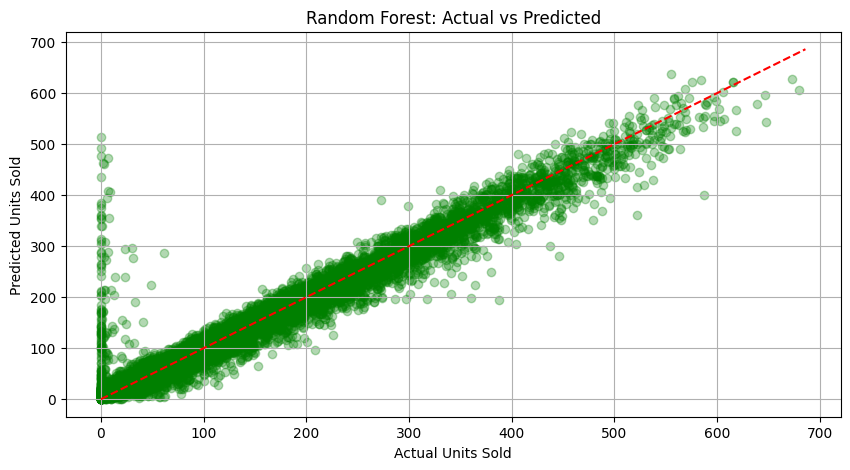

In [51]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='green')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()


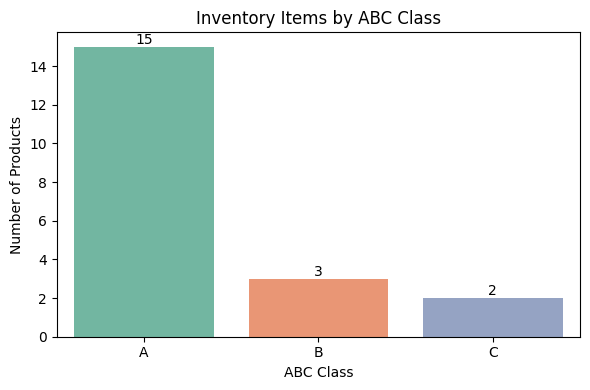

In [52]:
# Step 1: Aggregate total units sold per SKU (or product)
df_abc = df.groupby('productID')['unitsSold'].sum().reset_index()

# Step 2: Sort descending and compute cumulative percentage
df_abc = df_abc.sort_values(by='unitsSold', ascending=False)
df_abc['cum_percent'] = df_abc['unitsSold'].cumsum() / df_abc['unitsSold'].sum()

# Optional: Convert cumulative percentage to human-readable %
df_abc['cum_percent'] = df_abc['cum_percent'] * 100

# Optional: Add each product's individual contribution to total
df_abc['percent_of_total'] = df_abc['unitsSold'] / df_abc['unitsSold'].sum() * 100

# Step 3: Assign ABC class
def classify_abc(cum_pct):
    if cum_pct <= 80:
        return 'A'
    elif cum_pct <= 95:
        return 'B'
    else:
        return 'C'

df_abc['abc_class'] = df_abc['cum_percent'].apply(classify_abc)

# Optional: Visualize distribution of ABC classes

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_abc, x='abc_class', hue='abc_class', order=['A', 'B', 'C'], palette='Set2', legend=False)
plt.title('Inventory Items by ABC Class')
ax.set_xlabel("ABC Class")
ax.set_ylabel("Number of Products")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()


In [53]:
print(df_abc['abc_class'].isnull().sum())

0


In [54]:
df = df.merge(df_abc[['productID', 'abc_class']], on='productID', how='left')

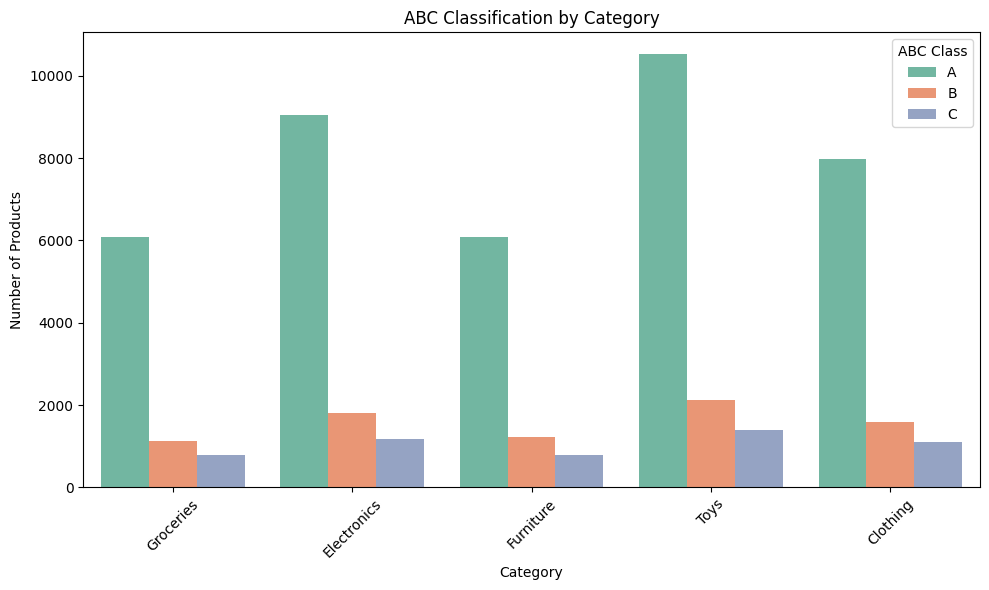

In [55]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='category', hue='abc_class', order=df['category'].unique(), palette='Set2')
plt.title("ABC Classification by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.legend(title='ABC Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [56]:
abc_summary = df.groupby(['category', 'abc_class'])['productID'].nunique().unstack().fillna(0)
print(abc_summary)


abc_class     A  B  C
category             
Clothing     15  3  2
Electronics  15  3  2
Furniture    15  3  2
Groceries    15  3  2
Toys         15  3  2


In [57]:
abc_product_list = df[['productID', 'category', 'abc_class']].drop_duplicates().sort_values(by=['abc_class', 'category'])
print(abc_product_list)


      productID   category abc_class
14        P0001   Clothing         A
2660      P0002   Clothing         A
5327      P0003   Clothing         A
10603     P0005   Clothing         A
13281     P0006   Clothing         A
...         ...        ...       ...
44917     P0018  Furniture         C
29157     P0012  Groceries         C
44919     P0018  Groceries         C
29156     P0012       Toys         C
44918     P0018       Toys         C

[100 rows x 3 columns]


In [58]:
abc_product_list.to_csv("ABC_Classification_By_Category.csv", index=False)


In [59]:
# Set buffer threshold as a variable for flexibility
buffer_threshold = 1.5

# Basic Inventory Health Indicators
df["stockout"] = (df["unitsSold"] > df["inventoryLevel"]).astype(int)
df["overstock"] = (df["inventoryLevel"] > df["demandForecast"] * buffer_threshold).astype(int)

# Quick summary output
print("🔺 Stockouts:", df["stockout"].sum())
print("📦 Overstocks:", df["overstock"].sum())


🔺 Stockouts: 7116
📦 Overstocks: 33283


🔺 7,116 stockouts: These indicate missed sales opportunities. Investigating which products/stores/time periods are most affected could reveal forecasting or replenishment issues.

📦 33,283 overstocks: That’s quite high and could imply excess holding costs, especially if concentrated in 'C' class items from your ABC analysis.

In [60]:
abc_health = df.groupby('abc_class')[['stockout', 'overstock']].sum()
print(abc_health)

           stockout  overstock
abc_class                     
A              5386      24964
B              1046       4973
C               684       3346


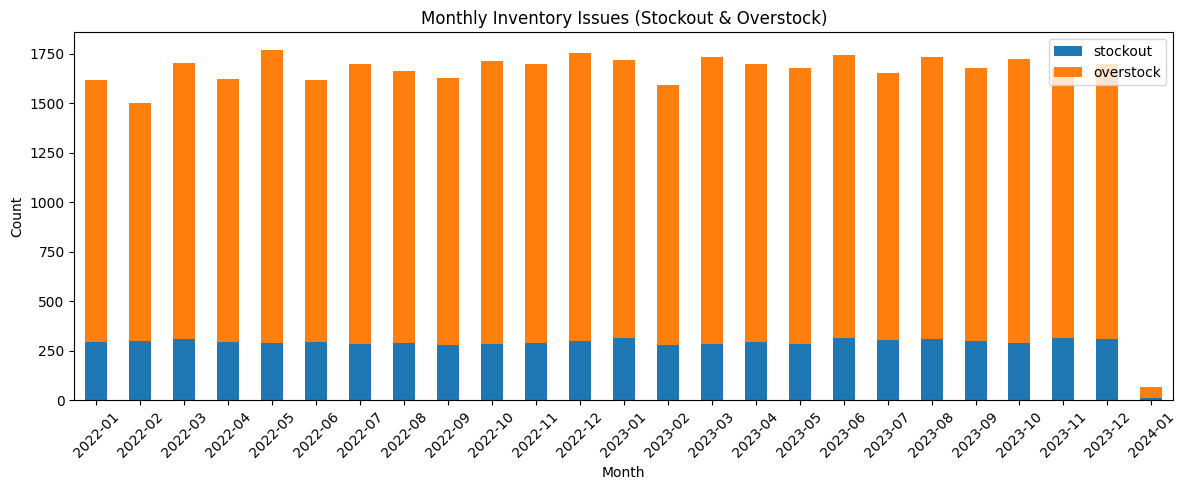

In [61]:
monthly_health = df.groupby(df['date'].dt.to_period('M'))[['stockout', 'overstock']].sum()
monthly_health.plot(kind='bar', figsize=(12, 5), stacked=True)
plt.title('Monthly Inventory Issues (Stockout & Overstock)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
df["healthy_inventory"] = ((df["stockout"] == 0) & (df["overstock"] == 0)).astype(int)

✅ Inventory Health Summary:
🟢 Healthy Inventory Entries: 12617
🔻 SKUs Below Reorder Point: 45025


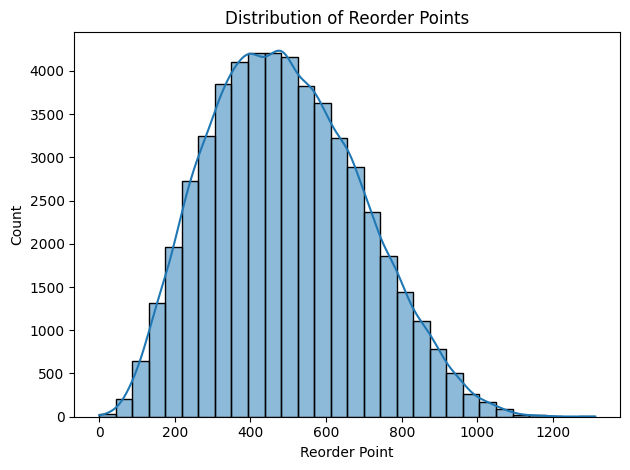

In [63]:
# 🟩 Inventory Health: Healthy, Safety Stock, and Reorder Point Calculations

# Flag healthy inventory: not overstocked and not stockout
# df["healthy_inventory"] = ((df["stockout"] == 0) & (df["overstock"] == 0)).astype(int)

# Parameters
lead_time = 2  # in weeks (adjust as needed)
Z = 1.65  # for 95% service level

# Rolling 4-week average and standard deviation of demand per product-store
df["avg_demand"] = df.groupby(['productID', 'storeID'])['unitsSold'].transform(lambda x: x.rolling(4, min_periods=1).mean())
df["std_demand"] = df.groupby(['productID', 'storeID'])['unitsSold'].transform(lambda x: x.rolling(4, min_periods=1).std())

# Safety Stock and Reorder Point
df["safety_stock"] = Z * df["std_demand"].fillna(0)
df["reorder_point"] = (df["avg_demand"] * lead_time) + df["safety_stock"]

# ✅ Optional Improvements

# Round values for better readability
df["safety_stock"] = df["safety_stock"].round(2)
df["reorder_point"] = df["reorder_point"].round(2)

# Flag SKUs where inventory is below the reorder point
df["below_reorder"] = (df["inventoryLevel"] < df["reorder_point"]).astype(int)

# Print summary
print("✅ Inventory Health Summary:")
print(f"🟢 Healthy Inventory Entries: {df['healthy_inventory'].sum()}")
print(f"🔻 SKUs Below Reorder Point: {df['below_reorder'].sum()}")

# Optional visualization (can be commented if not needed)
sns.histplot(df["reorder_point"], bins=30, kde=True)
plt.title("Distribution of Reorder Points")
plt.xlabel("Reorder Point")
plt.tight_layout()
plt.show()


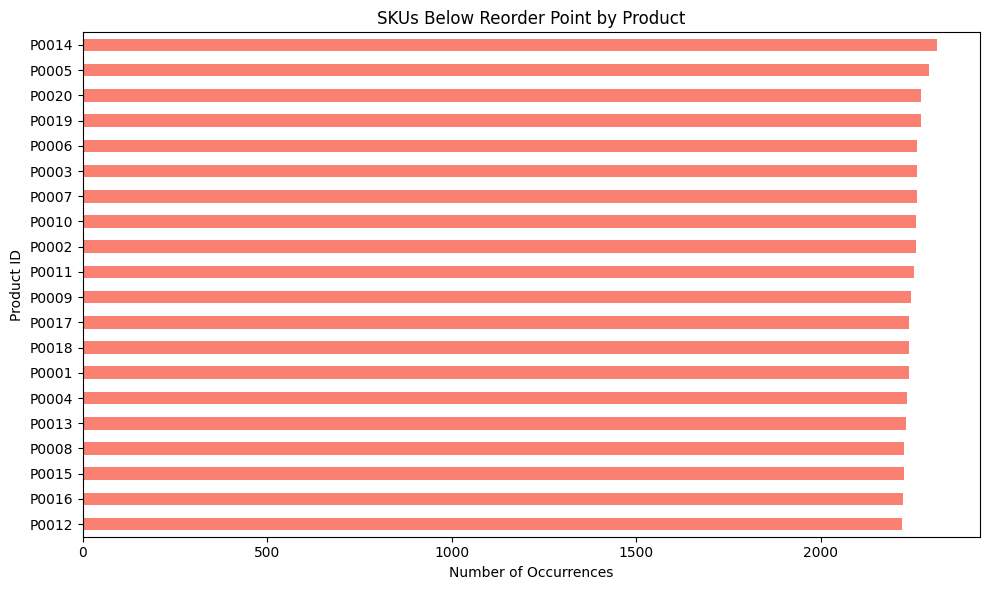

In [64]:
# 🔻 Visualize SKUs below reorder point by product

# Count how often each product is below reorder point
below_reorder_counts = df[df["below_reorder"] == 1]["productID"].value_counts().sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
below_reorder_counts.plot(kind='barh', color='salmon')
plt.title("SKUs Below Reorder Point by Product")
plt.xlabel("Number of Occurrences")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()


In [65]:
df["need_reorder"] = (df["inventoryLevel"] < df["reorder_point"]).astype(int)


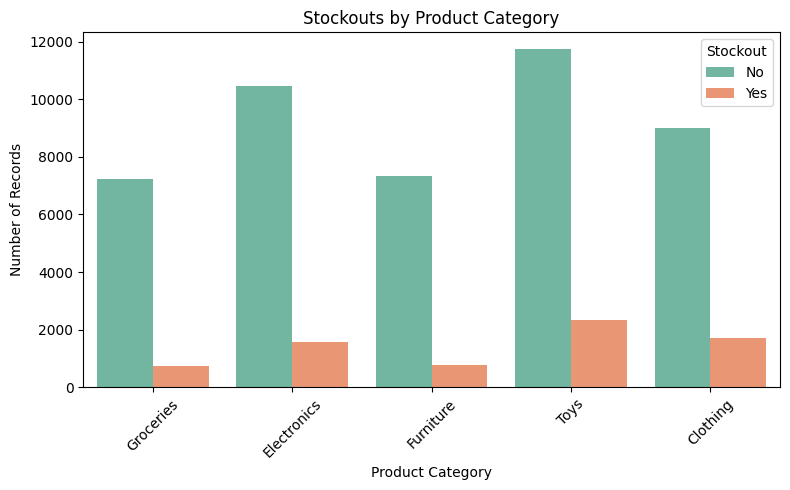

In [66]:
# 📊 Visualization: Stockouts by Category
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="category", hue="stockout", palette="Set2")
plt.title("Stockouts by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Records")
plt.legend(title="Stockout", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


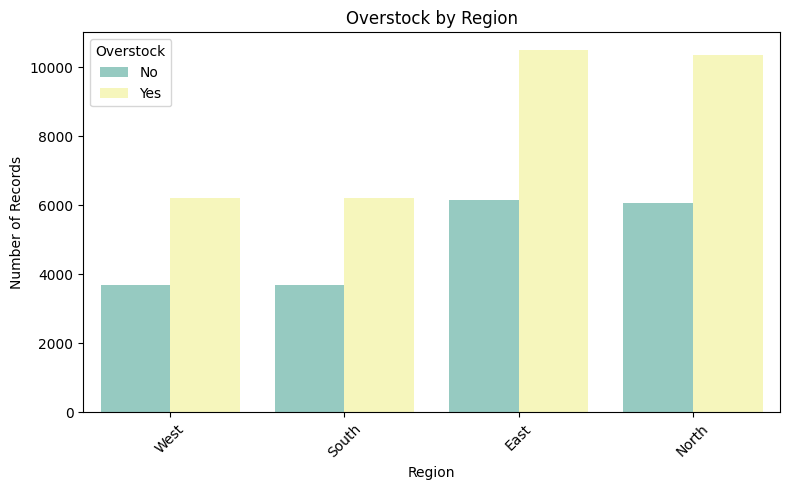

In [67]:

# 📊 Visualization: Overstock by Region
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="region", hue="overstock", palette="Set3")
plt.title("Overstock by Region")
plt.xlabel("Region")
plt.ylabel("Number of Records")
plt.legend(title="Overstock", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
# ✅ Optional Summary Stats
print(f"📌 Total Records Needing Reorder: {df['need_reorder'].sum()}")
print(f"📉 Total Stockouts: {df['stockout'].sum()}")
print(f"📦 Total Overstocks: {df['overstock'].sum()}")
print(f"✅ Healthy Inventory Records: {df['healthy_inventory'].sum()}")


📌 Total Records Needing Reorder: 45025
📉 Total Stockouts: 7116
📦 Total Overstocks: 33283
✅ Healthy Inventory Records: 12617


C:\Users\rahul\AppData\Local\Temp\ipykernel_5664\1448497117.py:51: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rahul\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


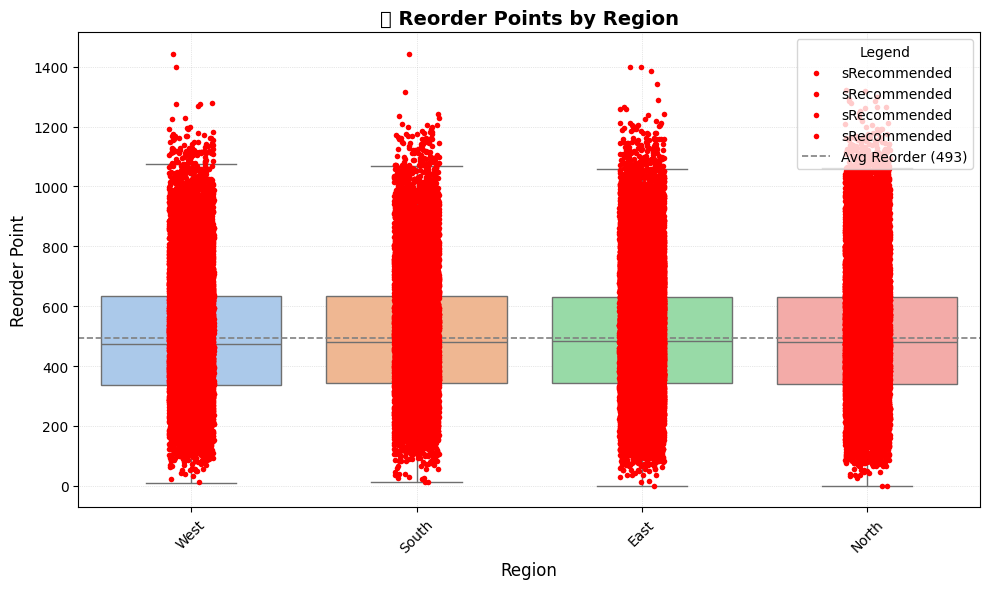

In [69]:
# Add recommended reorder point if not already present
if "recommended_reorder_point" not in df.columns:
    df["recommended_reorder_point"] = df["reorder_point"] * 1.1

plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(
    x='region',
    y='reorder_point',
    data=df,
    hue='region',
    palette='pastel',
    dodge=False,
    showfliers=False
)

# Stripplot for recommended reorder points
sns.stripplot(
    x='region',
    y='recommended_reorder_point',
    data=df,
    color='red',
    size=4,
    jitter=True,
    label='sRecommended'
)

# Mean labels
region_means = df.groupby('region')['recommended_reorder_point'].mean()
for i, (region, val) in enumerate(region_means.items()):
    plt.text(
        i, val + 10, f"{val:.0f}",
        color='red',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# Overall mean line
overall_mean = df['reorder_point'].mean()
plt.axhline(y=overall_mean, color='gray', linestyle='--', linewidth=1.2, label=f'Avg Reorder ({overall_mean:.0f})')

# Labels and formatting
plt.title('📦 Reorder Points by Region', fontsize=14, fontweight='bold')
plt.ylabel('Reorder Point', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Legend", loc='upper right')
plt.tight_layout()
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.6)
plt.show()


In [70]:
category_stats = df.groupby('category')['reorder_point'].agg(
    Mean='mean',
    StdDev='std',
    Minimum='min',
    Maximum='max'
)

region_stats = df.groupby('region')['reorder_point'].agg(
    Mean='mean',
    StdDev='std',
    Minimum='min',
    Maximum='max'
)


In [71]:
category_stats = category_stats.round(2)
region_stats = region_stats.round(2)

In [72]:
print("📦 Reorder Point Summary by Category:\n", category_stats,"\n")
print("\n🌍 Reorder Point Summary by Region:\n", region_stats)


📦 Reorder Point Summary by Category:
                Mean  StdDev  Minimum  Maximum
category                                     
Clothing     500.65  201.45     12.0  1173.72
Electronics  491.07  201.10      0.0  1272.94
Furniture    484.57  199.03     12.0  1311.67
Groceries    485.86  196.85      0.0  1310.98
Toys         496.33  199.86      0.0  1272.29 


🌍 Reorder Point Summary by Region:
           Mean  StdDev  Minimum  Maximum
region                                  
East    492.88  198.49      0.0  1272.29
North   492.40  200.16      0.0  1201.71
South   494.97  199.47     12.0  1311.67
West    490.22  202.61     10.0  1310.98


In [73]:
# Step 1: Group and compute mean/std
category_stats = df.groupby(['category', 'region'])['reorder_point'].agg(['mean', 'std']).reset_index()

# ✅ Debug check: ensure 'mean' and 'std' exist
# print(category_stats.head()

# Step 2: Only add recommended reorder point if mean & std are present
if 'mean' in category_stats.columns and 'std' in category_stats.columns:
    category_stats['recommended_reorder_point'] = (category_stats['mean'] + category_stats['std']).round(0)
else:
    raise KeyError("⛔ Columns 'mean' or 'std' not found in category_stats")

# ✅ Debug check: ensure new column exists
print(category_stats[['category', 'region', 'recommended_reorder_point']].head())

# Step 3: Merge into original dataframe
df = df.merge(category_stats[['category', 'region', 'recommended_reorder_point']], 
              on=['category', 'region'], how='left')

      category region  recommended_reorder_point
0     Clothing   East                      697.0
1     Clothing  North                      702.0
2     Clothing  South                      710.0
3     Clothing   West                      703.0
4  Electronics   East                      696.0


In [74]:
print(df.columns)  # to confirm 'recommended_reorder_point' is there
print(df[['category', 'reorder_point', 'recommended_reorder_point_x']].head())  # preview the data


Index(['date', 'storeID', 'productID', 'category', 'region', 'inventoryLevel',
       'unitsSold', 'unitsOrdered', 'demandForecast', 'price', 'discount',
       'weatherCondition', 'holiday/promotion', 'competitorPricing',
       'seasonality', 'month', 'day', 'dayOfWeek', 'weekOfYear', 'isWeekend',
       'unitsSold_lag1', 'demandForecast_lag1', 'abc_class', 'stockout',
       'overstock', 'healthy_inventory', 'avg_demand', 'std_demand',
       'safety_stock', 'reorder_point', 'below_reorder', 'need_reorder',
       'recommended_reorder_point_x', 'recommended_reorder_point_y'],
      dtype='object')
      category  reorder_point  recommended_reorder_point_x
0    Groceries         202.00                      222.200
1  Electronics         217.34                      239.074
2    Groceries         189.38                      208.318
3    Groceries         323.49                      355.839
4    Furniture         341.49                      375.639


In [75]:
print(df.columns)  # to confirm 'recommended_reorder_point' is there
print(df[['category', 'reorder_point', 'recommended_reorder_point_y']].head())  # preview the data


Index(['date', 'storeID', 'productID', 'category', 'region', 'inventoryLevel',
       'unitsSold', 'unitsOrdered', 'demandForecast', 'price', 'discount',
       'weatherCondition', 'holiday/promotion', 'competitorPricing',
       'seasonality', 'month', 'day', 'dayOfWeek', 'weekOfYear', 'isWeekend',
       'unitsSold_lag1', 'demandForecast_lag1', 'abc_class', 'stockout',
       'overstock', 'healthy_inventory', 'avg_demand', 'std_demand',
       'safety_stock', 'reorder_point', 'below_reorder', 'need_reorder',
       'recommended_reorder_point_x', 'recommended_reorder_point_y'],
      dtype='object')
      category  reorder_point  recommended_reorder_point_y
0    Groceries         202.00                        688.0
1  Electronics         217.34                        693.0
2    Groceries         189.38                        689.0
3    Groceries         323.49                        679.0
4    Furniture         341.49                        684.0


In [76]:
df = df.rename(columns={'recommended_reorder_point_y': 'recommended_reorder_point'})

C:\Users\rahul\AppData\Local\Temp\ipykernel_5664\2984669784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='reorder_point', palette='pastel')


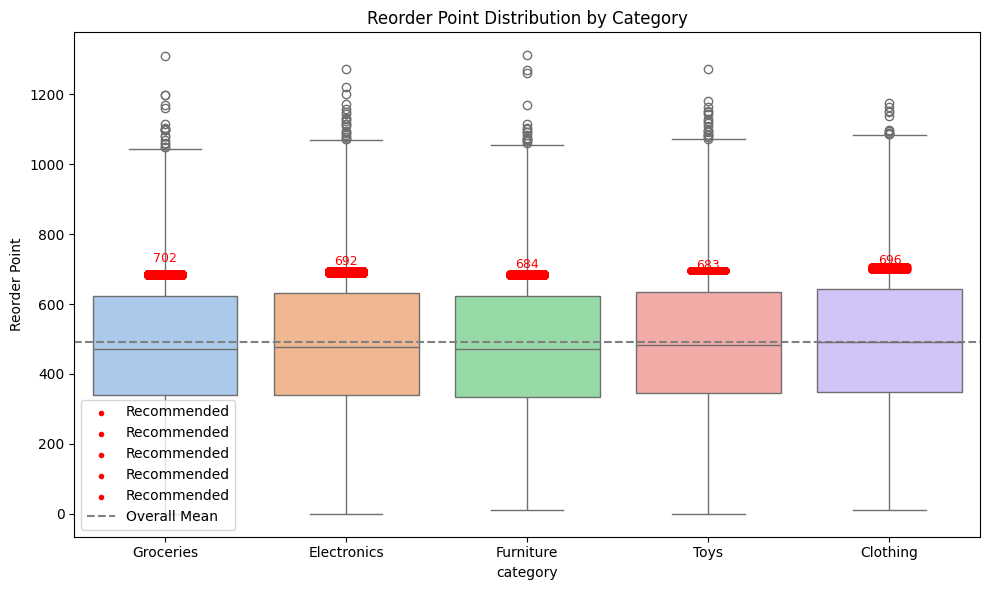

In [77]:

plt.figure(figsize=(10, 6))

# Boxplot (without invalid legend param)
sns.boxplot(data=df, x='category', y='reorder_point', palette='pastel')

# Recommended reorder point (as red dots)
sns.stripplot(data=df, x='category', y='recommended_reorder_point', color='red', size=4, label='Recommended', jitter=True)

# Add text labels for recommended reorder points
category_means = df.groupby('category')['recommended_reorder_point'].mean()
for i, (cat, val) in enumerate(category_means.items()):
    plt.text(i, val + 10, f"{val:.0f}", color='red', ha='center', va='bottom', fontsize=9)

# Overall reorder point mean
plt.axhline(y=df['reorder_point'].mean(), color='gray', linestyle='--', label='Overall Mean')

# Plot labels and legend
plt.title("Reorder Point Distribution by Category")
plt.ylabel("Reorder Point")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\rahul\AppData\Local\Temp\ipykernel_5664\2798832760.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category_region', y='reorder_point', palette='pastel')


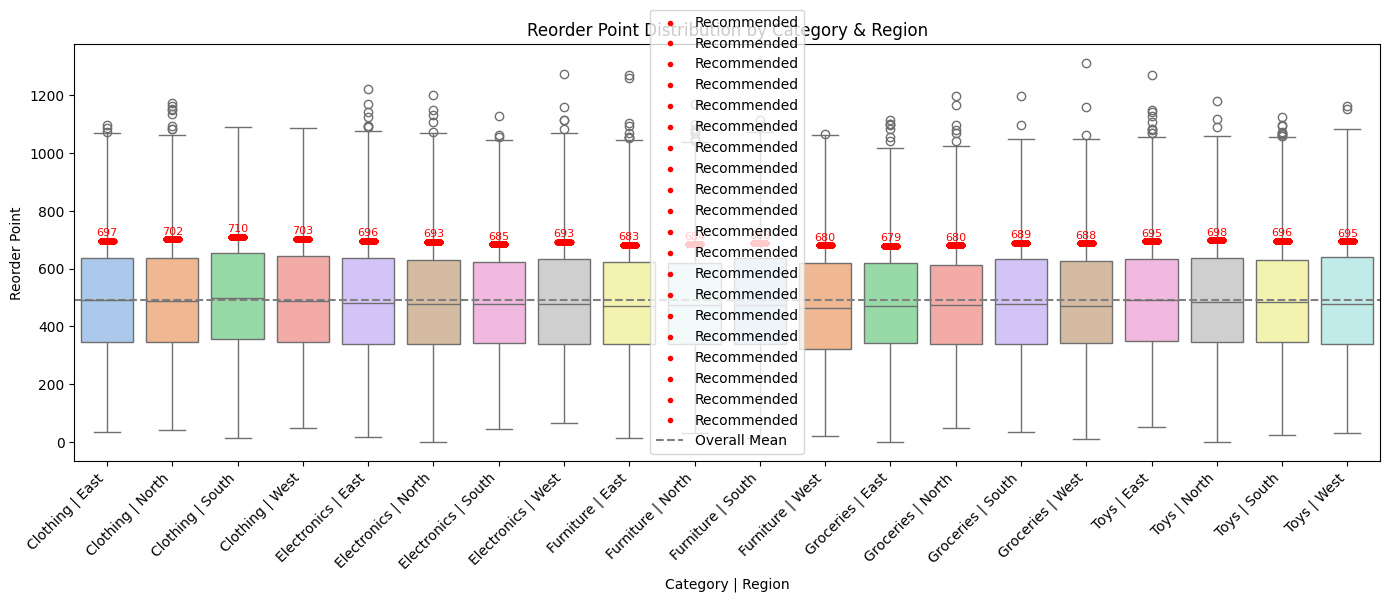

In [78]:

# Create a new column for category-region combo
df['category_region'] = df['category'] + ' | ' + df['region']

# Sort for consistent plotting
df = df.sort_values('category_region')

plt.figure(figsize=(14, 6))

# Boxplot
sns.boxplot(data=df, x='category_region', y='reorder_point', palette='pastel')

# Recommended reorder points as red dots
sns.stripplot(data=df, x='category_region', y='recommended_reorder_point', 
              color='red', size=4, jitter=True, label='Recommended')

# Add text labels for recommended reorder points (mean per group)
group_means = df.groupby('category_region')['recommended_reorder_point'].mean()
for i, (cat_region, val) in enumerate(group_means.items()):
    plt.text(i, val + 10, f"{val:.0f}", color='red', ha='center', va='bottom', fontsize=8)

# Horizontal line for overall reorder point mean
plt.axhline(y=df['reorder_point'].mean(), color='gray', linestyle='--', label='Overall Mean')

# Final touches
plt.title("Reorder Point Distribution by Category & Region")
plt.ylabel("Reorder Point")
plt.xlabel("Category | Region")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
